In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from matplotlib import style 
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.cluster import KMeans 
from filterpy.kalman import KalmanFilter
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Termer
PCA: Principal Component Analysis

SVM (SVC): Support Vector Machine 

k-NN: K Nearest Neighbour

ICP: Iterative Closest Point

PnP: Perspective-n-Point - Perspective-n-Point[1] is the problem of estimating the pose of a calibrated camera given a set of n 3D points in the world and their corresponding 2D projections in the image. The camera pose consists of 6 degrees-of-freedom (DOF) which are made up of the rotation (roll, pitch, and yaw) and 3D translation of the camera with respect to the world.

SIFT: Scale Invariant Feutare Transform

Epipolar lines: In rectified stereo, the epipolar lines are always parallel, which simplifies the correspondence problem between the left and right images.

## Filter - Neighborhood operator or local-operator
### Linear - Fixed weighted combinations of pixels in small neighborhoods

#### Kernels
Cross-Correlation G = h ⦻ F (plus). Non-associative. Order of correlation does matter. Every kernel has to be applied one by one.

Convolution (convolve) G = h ∗ F (minus) - FLIP KERNEL!. Associative. Order of convolution does not matter. Kernels can be combined aka. super kernel.
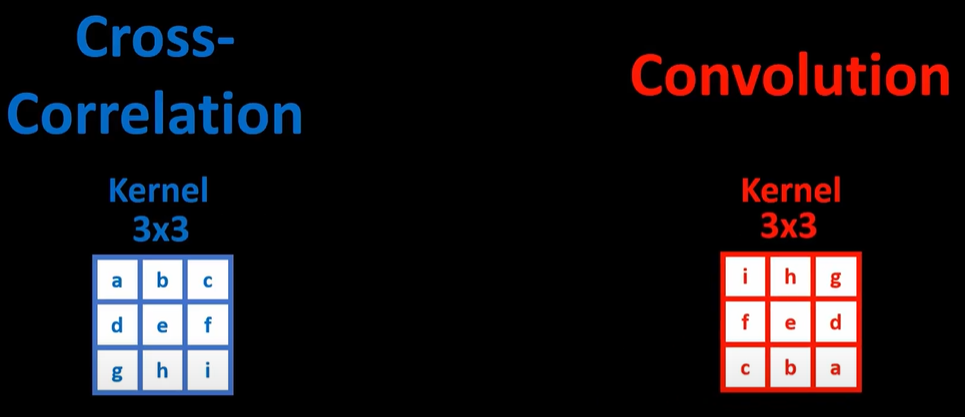

If symmetric about the origin, correlation and convolution is the same

Pixel close to boundaries are padded with zeroes or wrapped around.

Common linear filters:
- Gaussian filter - used for smoothing and noise reduction
- Median filter - used for removing salt and pepper noise
- Sobel filter - used for edge detection
- Laplacian filter - used for detecting edges and features
- Bilateral filter - used for noise reduction while preserving edges


### Non-linear
Common non-linear filters:
- Nonlinear diffusion filter - used for smoothing and preserving edges
- Anisotropic diffusion filter - used for edge preserving smoothing
- Adaptive median filter - used for removing impulsive noise
- Bilateral filter - also a nonlinear filter that can be used for noise reduction while preserving edges

## Detectors
### Corner detectors
- Shi-Tomasi corner detector: It is similar to the Harris corner detector, but uses a different scoring function to select the best corners. It is generally more robust and accurate than the Harris detector.

- FAST corner detector: It is a high-speed corner detection algorithm that uses a simple scoring function to detect corners quickly. It is widely used in real-time applications due to its fast performance.

- Moravec corner detector: It is a simple and efficient corner detector that uses a sliding window to detect corners by comparing the sum of squared differences between two neighboring regions.

- SIFT detector: It is a scale-invariant feature transform detector that is used to detect and describe local features in images. It is commonly used in applications such as object recognition and image stitching.

- SURF detector: It is similar to SIFT, but uses a faster algorithm to detect and describe local features. It is commonly used in applications such as object recognition and image registration.

- ORB detector: It is a fast and efficient detector that combines the advantages of both SIFT and SURF detectors. It is commonly used in real-time applications due to its fast performance and good accuracy.

- Hough: The Hough Transform is a feature extraction technique that is used to detect geometric shapes in an image, such as lines, circles, and ellipses.

#### Hough
Although the Hough transform is widely used in computer vision, it is also used in other fields such as signal processing and pattern recognition.

The Hough transform is susceptible to outliers, which can lead to incorrect results. However, there are variations of the Hough transform that are designed to handle outliers, such as the Randomized Hough Transform (RHT) and the Progressive Probabilistic Hough Transform (PPHT).

The third statement is partially correct. RANSAC (Random Sample Consensus) is an alternative to the Hough transform that can be used for robust fitting of models to data in the presence of outliers. RANSAC is particularly useful when the dimension of the feature space is high, as it can handle a large number of outliers. However, the Hough transform can also be used in high-dimensional feature spaces, and can be more efficient than RANSAC for certain types of problems.

#### SIFT
The detection stage in the Scale-Invariant Feature Transform (SIFT) algorithm is based on finding keypoints (also known as interest points) in an image that are distinctive and repeatable across different scales and orientations.

To detect keypoints, SIFT uses a Difference of Gaussian (DoG) approach to identify areas of high contrast and eliminate areas of low contrast. The DoG is computed by convolving the image with a Gaussian filter at different scales and subtracting adjacent scales. The resulting image is then searched for local maxima and minima across space, scale, and orientation to identify keypoints.

Once keypoints are identified, SIFT computes a descriptor for each keypoint by extracting local gradient information in a region around the keypoint. The descriptor is used to match keypoints across different images or to recognize objects in an image.

Overall, the SIFT algorithm is widely used for feature detection, matching, and object recognition due to its ability to detect and describe distinctive features that are invariant to scale, rotation, and illumination changes.

Overall, the SIFT descriptor is based on the gradient of the image, and is designed to capture information about the orientation and magnitude of gradients in the local region around a keypoint.

### Edge detectors
- Canny edge detector: It is a multi-stage edge detection algorithm that is widely used in computer vision. It is known for its ability to accurately detect edges while suppressing noise.

- Sobel edge detector: It is a simple and efficient edge detection algorithm that uses two kernels to detect edges in the x and y directions.

- Laplacian of Gaussian (LoG) edge detector: It is a second-order derivative edge detection algorithm that uses the Laplacian of Gaussian filter to detect edges. It is generally more sensitive to edges than other edge detectors, but also more susceptible to noise.

- Zero-crossing edge detector: It is a simple edge detection algorithm that uses the sign of the Laplacian of an image to detect zero-crossings, which are indicative of edges.

- Roberts cross edge detector: It is a simple and efficient edge detection algorithm that uses two kernels to detect edges in the x and y directions. It is similar to the Sobel edge detector, but uses smaller kernels.

- Prewitt edge detector: It is a simple and efficient edge detection algorithm that uses two kernels to detect edges in the x and y directions. It is similar to the Sobel edge detector, but uses different kernels.


# Former questions:
Linear spatial filter - output = average of pixels

Nonlinear smoothing filter - based on ranking of pixel values

SIFT - detection based on Difference of Gaussians. Description based on Gradient of Image.

Hough transform - can be used to detect lines. RANSAC should be used as an alternative to the Hough transform when the dimension of feature is high 

Epipolar geometry - can be used to describe both unrectified and rectified stereo cases

Monocular camera - the projection matrix includes intrinsic parameters, when using a flat calibration pattern we can employ the homography to perform calibration

# Code

#### Convolution and correlation with kernels

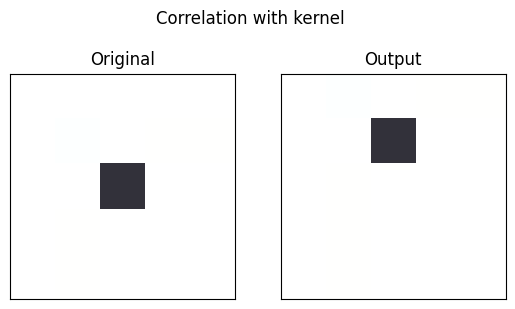

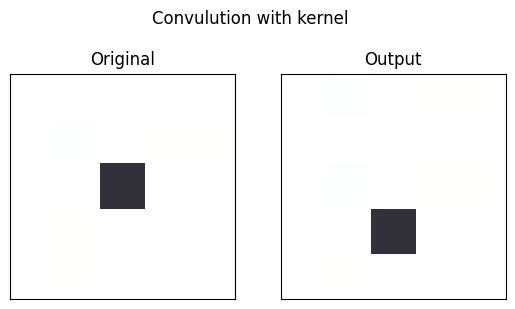

In [4]:
kernel = np.array([[0, 0, 0],
                   [0, 0, 0],
                   [0, 1, 0]])

# Load image
img = cv2.imread('test2.jpg')

# Cross-correlation with kernel
result = cv2.filter2D(img, -1, kernel)

#plot both images using plt
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result), plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.suptitle('Correlation with kernel')
plt.subplots_adjust(top=1.115)
plt.show()

# Convolution with kernel
kernel = np.flipud(np.fliplr(kernel))
result = cv2.filter2D(img, -1, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result),plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.suptitle('Convulution with kernel')
plt.subplots_adjust(top=1.115)
plt.show()

#### Canny edge detection and hough lines

In [5]:
# Read in the image
img = cv2.imread('Exam Files/Question_10/books.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply canny edge detector
edges = cv2.Canny(gray, 100, 200)

# Apply hough line transform
lines = cv2.HoughLines(edges, 1, 0.0017, 200, None, 0, 0) # NOT HOUGHLINESP

print(len(lines))


32


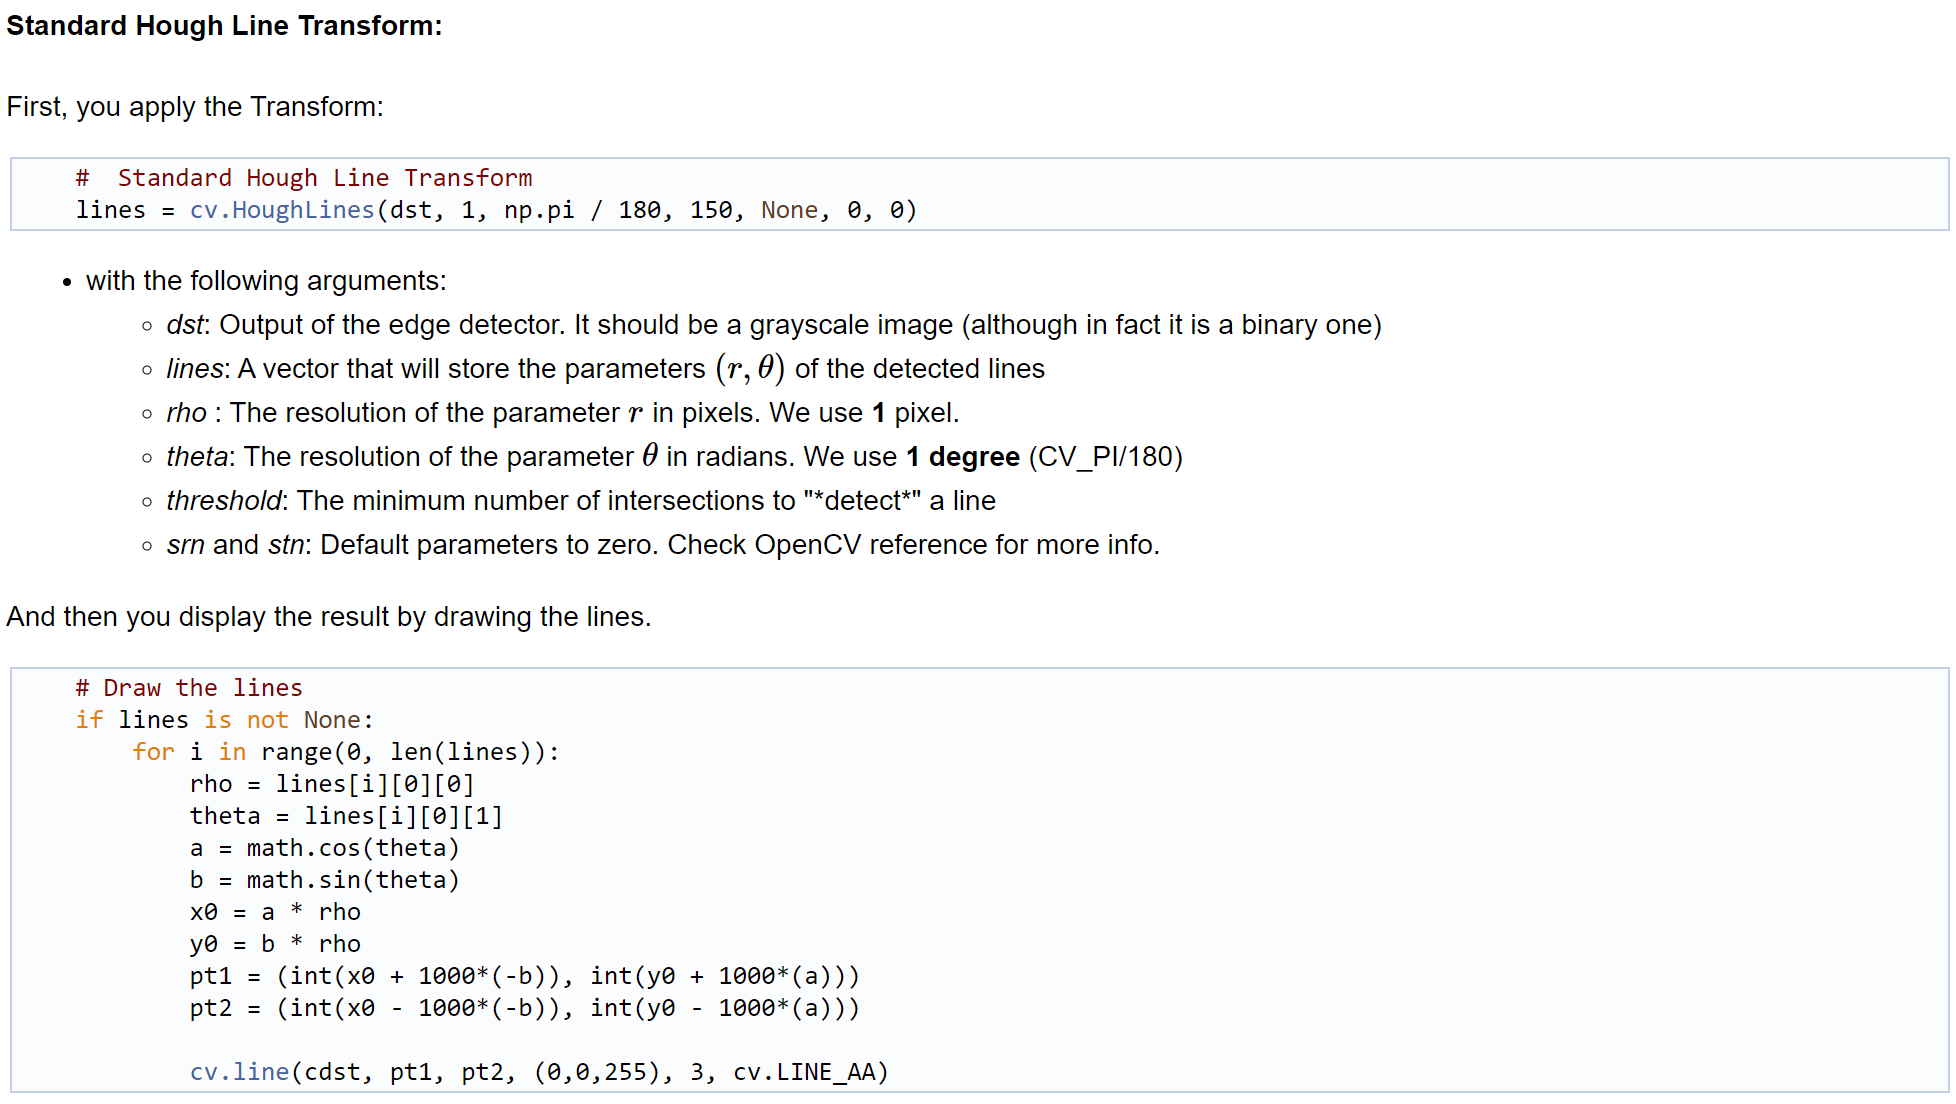

#### Harris Corner Detector

In [5]:
# Read in the image
img = cv2.imread('Exam Files/Question_11/books.png')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Harris corner detection with specified parameters
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Count number of corner points with response value above 0.01
num_corners = np.sum(dst > 0.01) # Or num_corners = len(dst[dst > 0.01])

# Print number of corner points
print("Number of corner points with response value above 0.01:", num_corners)


Number of corner points with response value above 0.01: 188


#### goodFeaturesToTrack & optical flow

In [8]:
import cv2
import numpy as np

# Load the two images
img1 = cv2.imread('Exam Files/Question_12/things1.png')
img2 = cv2.imread('Exam Files/Question_12/things2.png')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Find features on the first image using cv2.goodFeaturesToTrack
corners = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7)

# Find features on the second image using cv2.calcOpticalFlowPyrLK
corners2, status, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, corners, None)

# Print mixumum amount of pixels moved for any object in the x-direction
print("Maximum amount of pixels moved for any object in the x-direction:", np.max(corners2[:, 0, 0] - corners[:, 0, 0]))

# Print mixumum amount of pixels moved for any object in the y-direction
print("Maximum amount of pixels moved for any object in the y-direction:", np.max(corners2[:, 0, 1] - corners[:, 0, 1]))

Maximum amount of pixels moved for any object in the x-direction: 15.636841
Maximum amount of pixels moved for any object in the y-direction: 15.197693


#### Epipolar lines

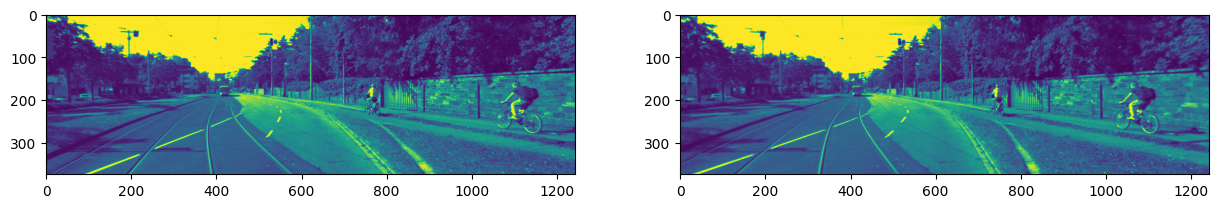

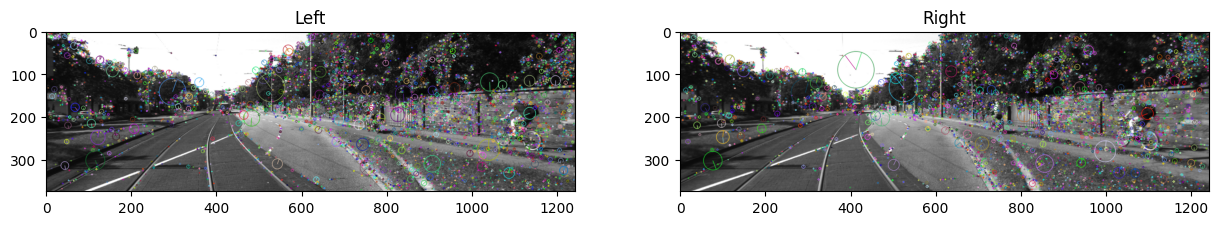

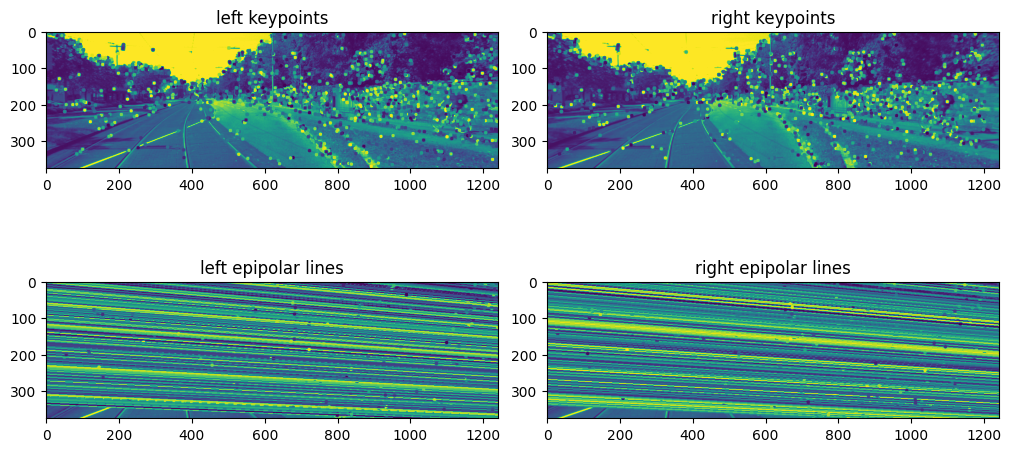

In [8]:
img1 = cv2.imread('Exam Files/Question_18/left.png', 0)
img2 = cv2.imread('Exam Files/Question_18/right.png', 0)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axs[0].imshow(img1)
axs[1].imshow(img2)
img1.shape

# Create a sift detector
sift = cv2.xfeatures2d.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

kp_img_1 = cv2.drawKeypoints(img1, kp1, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
kp_img_2 = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].imshow(kp_img_1)
ax[0].set_title('Left')
ax[1].imshow(kp_img_2)
ax[1].set_title('Right')
bf = cv2.BFMatcher()
matches = bf.match(des1, des2)
# 2000 best matches                      #CHANGE HERE
matches = sorted(matches, key = lambda x:x.distance)[:2000]  #change here

# From exercise 2 week 4
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,2)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1, img2
# Extract points of matches
pts1 = []
pts2 = []

# Using 2000 best matches
for m in matches:
    # Extract points corresponding to matches.
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
    
"""
Implement findFundamentalMat here:
"""
F, mask =cv2.findFundamentalMat(pts1, pts2, method=cv2.FM_RANSAC)

# We select only inlier points.
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2 ,F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1.copy(), img2.copy(), lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2.copy(), img1.copy(), lines2, pts2, pts1)

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10,5))
axs[0, 0].imshow(img4)
axs[0, 0].set_title('left keypoints')
axs[0, 1].imshow(img6)
axs[0, 1].set_title('right keypoints')
axs[1, 0].imshow(img5)
axs[1, 0].set_title('left epipolar lines')
axs[1, 1].imshow(img3)
axs[1, 1].set_title('right epipolar lines')
plt.show()



In [6]:
w, h = lines1.shape
######### THE AVERAGE OF ALL EPILINES #########
print(sum(lines1)/w)
avg1 = sum(lines1)/w
print(sum(lines2)/w)
avg2 = sum(lines2)/w

[-6.69333264e-02  9.97691572e-01 -1.26727486e+02]
[ 7.0291542e-02 -9.9747336e-01  1.2541019e+02]


#### RANSAC iterations

In [ ]:
p = 0.98 #probability of ransac choosing a set without outliers
w = 0.75 #proportion of inliers with respect to all the points in the dataset
# Formula from the question:
k = (np.log(1-p))/(np.log(1-w**2))
print(k)

#### SKLEARN (clusters) - Elbow

c:\Users\Stoff\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Stoff\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Stoff\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Stoff\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

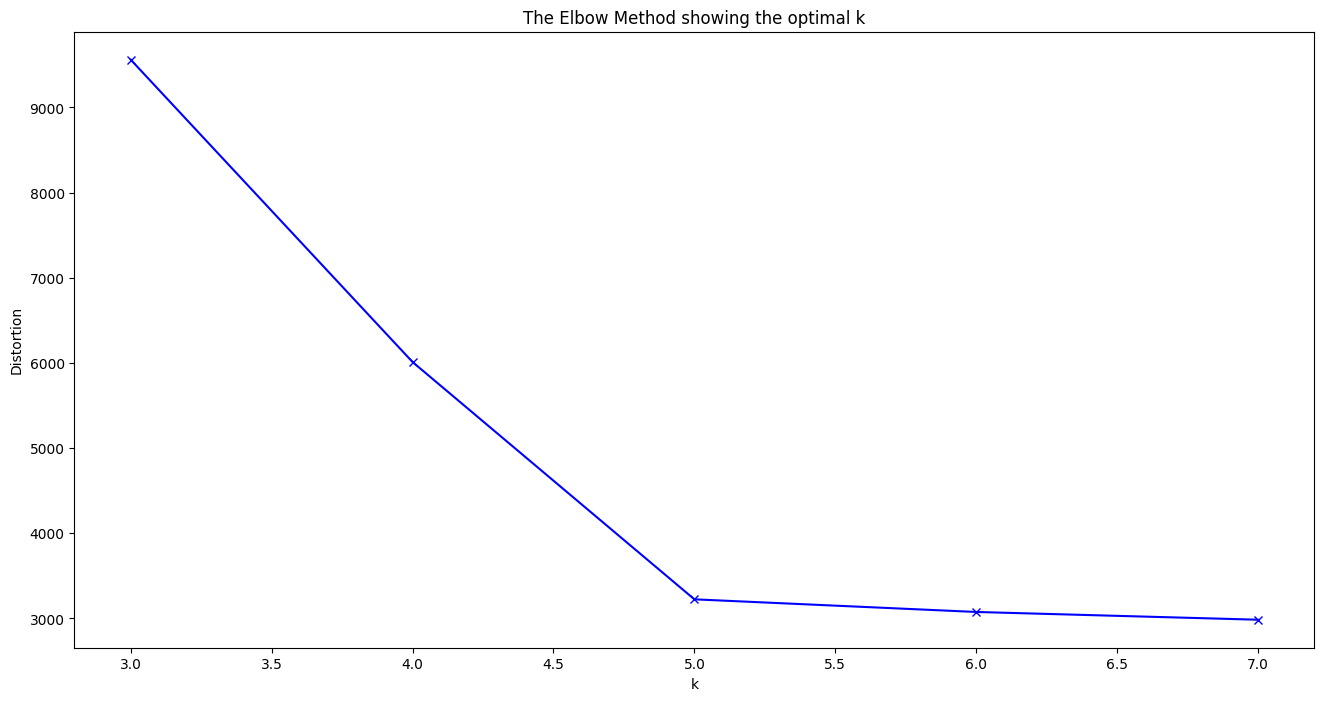

In [15]:
# Parameters
K_option = [3,4,5,6,7]   # change here

# Loading the data
X = np.loadtxt('Exam Files/Question_23/clusters.txt', dtype=int)

distortions = []
for k in K_option:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # save score
    score = kmeans.score(X)
    distortions.append(kmeans.inertia_)

# Elbow method
# k nums which are shown after the steep curve are the solutions
plt.figure(figsize=(16,8))
plt.plot(K_option, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')



In [20]:
#Question 29.1 +29.2
# Parameters
data_path_x = 'Exam Files/Question_29/svm_x.txt'
data_path_y = 'Exam Files/Question_29/svm_y.txt'

# Load data
x = np.loadtxt(data_path_x, dtype=float)
y = np.loadtxt(data_path_y, dtype=int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1337) #change here 30% for testing and 70% for training
print(f"Proportion used for training: {len(X_train)*100/len(x):.1f}%")

# Apply SVM with Linear Kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")

Proportion used for training: 69.9%
Accuracy: 0.96


SVC kan have forskellige kernels:
- linear
- poly
- rbf
- precomputed